### Exercise 35

#### Import

In [1]:
import numpy as np
from numpy.linalg import inv, det
import pandas as pd
import matplotlib.pyplot as plt

#### Data

In [2]:
df = pd.read_csv('sinusoidal.csv')

x = df[['x']].to_numpy()
y = df[['y']].to_numpy()
n = len(x)

x = x.reshape((n,))
y = y.reshape((n,))

#### Functions

In [3]:
def create_Phi_poly(x, p, n):
    X = np.zeros((n, p))
    
    for i in range(n):
        for j in range(p):
            X[i][j] = x[i]**j
    return X


def create_Phi_gauss(x, p, n):
    X = np.zeros((n, p))
    centres = np.linspace(0, 1, p)
    
    for i in range(n):
        for j in range(p):
            X[i][j] = np.exp(-50*(x[i] - centres[j])**2)
    return X


def fitted_curve_poly(space, w, mplot, p):
    result = np.zeros(mplot)
    for j in range(p):
        result += w[j] * space**j
    return result


def fitted_curve_gauss(space, w, mplot, p):
    result = np.zeros(mplot)
    centres = np.linspace(0, 1, p)
    for j in range(p):
        result += w[j] * np.exp(-50*(space - centres[j])**2)
    return result


def get_log_ML(alpha, beta, x, y, n, p):
    Phi = create_Phi_poly(x, p, n)
    A = alpha*np.eye(p) + beta*Phi.T @ Phi
    detA = det(A)
    S = inv(A)
    m = beta*S @ Phi.T @ y
    Em = .5*beta*(y - Phi @ m).T @ (y - Phi @ m) + .5*alpha* m.T @ m
    return (p/2)*np.log(alpha) + (n/2)*np.log(beta) - Em - (1/2)*np.log(detA) - (p/2)*np.log(2*np.pi)

#### Parameters

In [7]:
ps = np.arange(1, 10+1)
alpha = .0001
beta = 10

#### Calculations and plots

In [8]:
log_MLs = np.zeros(len(ps))
for j in range(len(ps)):
    p = ps[j]
    log_MLs[j] = get_log_ML(alpha, beta, x, y, n, p)

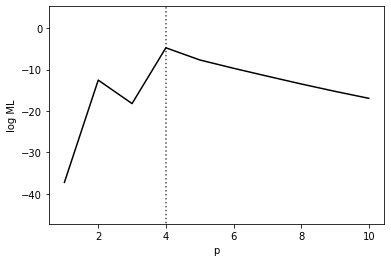

In [10]:
plt.plot(ps, log_MLs,color='black')
plt.xlabel('p')
plt.vlines(1 + np.argmax(log_MLs), -100, 100, color='black', linestyle='dotted', alpha=.7)
plt.ylim(np.min(log_MLs) - 10, np.max(log_MLs) + 10)
plt.ylabel('log ML')
plt.show()